In [1]:
import os

os.chdir('C:/대학원/2019-1/1.전공/2.데이터마이닝/project/도로/result')
os.getcwd()

'C:\\대학원\\2019-1\\1.전공\\2.데이터마이닝\\project\\도로\\result'

In [58]:
import pandas as pd

car_jg = pd.read_csv('car_jg.csv')

In [4]:
pd.set_option('display.max_columns', 500)
car_jg.head(5)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,value,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5
0,20180101,월,금호로,1010006200,청구역,광희문,상행,660,1.0,보조간선도로,외곽,중구,6,25.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
1,20180101,월,금호로,1010006100,광희문,청구역,하행,674,1.0,보조간선도로,외곽,중구,6,27.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
2,20180101,월,금호로,1030014900,청구역,신금호역,하행,1083,2.0,보조간선도로,외곽,중구,6,26.74,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
3,20180101,월,남대문로,1010016900,광교,을지로1가,상행,313,5.0,보조간선도로,도심권,중구,6,30.82,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
4,20180101,월,남대문로,1010011300,을지로1가,명동입구,상행,270,4.0,보조간선도로,도심권,중구,6,35.28,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [6]:
cluster_car_jg = car_jg.drop_duplicates('link_id',keep='first')
cluster_car_jg = cluster_car_jg[['road_name', 'link_id','road_type','speed_limit','road_length','cctv', 'signal']]

In [7]:
cluster_car_jg.head(5)

,road_name,link_id,road_type,speed_limit,road_length,cctv,signal
0,금호로,1010006200,보조간선도로,40.0,660,1.0,52.0
1,금호로,1010006100,보조간선도로,40.0,674,1.0,52.0
2,금호로,1030014900,보조간선도로,40.0,1083,2.0,52.0
3,남대문로,1010016900,보조간선도로,60.0,313,1.0,10.0
4,남대문로,1010011300,보조간선도로,60.0,270,1.0,10.0


In [8]:
cluster_car_jg['signal_length'] = cluster_car_jg['signal']/cluster_car_jg['road_length']

In [9]:
def highway(x) :
    if x == '도시고속도로' :
        return 1
    else : return 0
            
cluster_car_jg['road_type_1'] = cluster_car_jg['road_type'].apply(lambda x : highway(x))
cluster_car_jg.drop(['road_type','cctv'],axis=1,inplace=True)

In [10]:
cluster_car_jg.columns

Index(['road_name', 'link_id', 'speed_limit', 'road_length', 'signal',
       'signal_length', 'road_type_1'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_df = cluster_car_jg.drop(['road_name', 'link_id'],axis=1)
scaler.fit(scale_df)
scale_df = scaler.transform(scale_df)

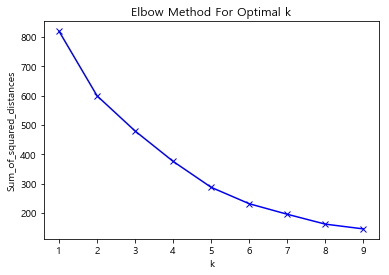

In [12]:
SSD = []
n = 10

for k in range(1,n):
    km = KMeans(n_clusters = k)
    km = km.fit(scale_df)
    SSD.append(km.inertia_)
    
plt.plot(range(1,n), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
k = 3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_car_jg.drop(['road_name', 'link_id'],axis=1)) 
cluster_car_jg['cluster'] = km.predict(cluster_car_jg.drop(['road_name', 'link_id'],axis=1))

In [14]:
k = 3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(scale_df) 
cluster_car_jg['cluster'] = km.predict(scale_df)

In [15]:
print(cluster_car_jg.cluster.value_counts())
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['speed_limit', 'road_length', 'signal',
       'signal_length', 'road_type_1'].mean())

2    96
0    59
1    50
Name: cluster, dtype: int64


,speed_limit,road_length,signal,signal_length,road_type_1
cluster,,,,,
0,36.610169,610.355932,23.322034,0.043688,0.0
1,38.600000,284.180000,54.240000,0.202674,0.0
2,58.854167,385.145833,29.510417,0.085232,0.0


In [16]:
print(cluster_car_jg.cluster.value_counts())
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['speed_limit', 'road_length', 'signal',
       'signal_length', 'road_type_1'].mean())

2    96
0    59
1    50
Name: cluster, dtype: int64


,speed_limit,road_length,signal,signal_length,road_type_1
cluster,,,,,
0,36.610169,610.355932,23.322034,0.043688,0.0
1,38.600000,284.180000,54.240000,0.202674,0.0
2,58.854167,385.145833,29.510417,0.085232,0.0


In [36]:
cluster_car_jg = pd.merge(cluster_car_jg, car_jg[['road_type','link_id']], on='link_id')
cluster_car_jg.head(1)

,road_name,link_id,speed_limit,road_length,signal,signal_length,road_type_1,cluster
0,금호로,1010006200,40.0,660,52.0,0.078788,0,0


In [42]:
cluster_car_jg = cluster_car_jg.drop_duplicates('link_id',keep='first')

In [43]:
cluster_car_jg.head(5)

,road_name,link_id,speed_limit,road_length,signal,signal_length,road_type_1,cluster,road_type
0,금호로,1010006200,40.0,660,52.0,0.078788,0,0,보조간선도로
5794,금호로,1010006100,40.0,674,52.0,0.077151,0,0,보조간선도로
11614,금호로,1030014900,40.0,1083,52.0,0.048015,0,0,보조간선도로
17576,남대문로,1010016900,60.0,313,10.0,0.031949,0,2,보조간선도로
23538,남대문로,1010011300,60.0,270,10.0,0.037037,0,2,보조간선도로


In [44]:
print(cluster_car_jg[cluster_car_jg['cluster']==0]["road_type"].value_counts())
print(cluster_car_jg[cluster_car_jg['cluster']==1]["road_type"].value_counts())
print(cluster_car_jg[cluster_car_jg['cluster']==2]["road_type"].value_counts())

보조간선도로    29
주간선도로     15
기타도로      15
Name: road_type, dtype: int64
주간선도로     42
보조간선도로     8
Name: road_type, dtype: int64
주간선도로     73
보조간선도로    20
기타도로       3
Name: road_type, dtype: int64


In [17]:
cluster_df = cluster_car_jg[['link_id','cluster']]

In [18]:
cluster_df = pd.merge(car_jg,cluster_df, on='link_id')

In [19]:
cluster_df.columns

Index(['date', 'days', 'road_name', 'link_id', 'start_point', 'end_point',
       'direction', 'road_length', 'road_num', 'road_type', 'urban_suburb',
       'district', 'time', 'value', 'cctv', 'kids', 'speed_limit', 'entrance',
       'signal', 'd1', 'd2', 'd3', 'd4', 'victims', 'severity',
       'accident_count', 'inter_num', 'temperature', 'wind', 'rain', 'snow',
       'holiday', 'special', 'vacation', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM2.5', 'cluster'],
      dtype='object')

In [21]:
cluster_df['hsv'] = cluster_df['holiday']+cluster_df['special']+cluster_df['vacation']

[]

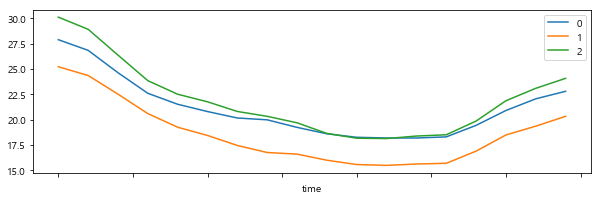

In [23]:
time = pd.DataFrame(cluster_df[cluster_df['hsv']==0].groupby(['cluster','time'])['value'].mean())
time = time.unstack()
time

plt.figure(figsize=(10,3))
time.loc[0, :].plot()
time.loc[1, :].plot()
time.loc[2, :].plot()

plt.xlabel('time')
plt.legend()
plt.plot()

[]

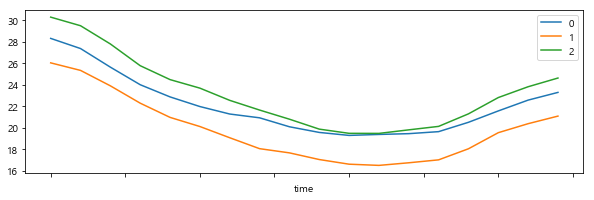

In [24]:
time = pd.DataFrame(cluster_df[cluster_df['hsv']!=0].groupby(['cluster','time'])['value'].mean())
time = time.unstack()
time

plt.figure(figsize=(10,3))
time.loc[0, :].plot()
time.loc[1, :].plot()
time.loc[2, :].plot()

plt.xlabel('time')
plt.legend()
plt.plot()

In [25]:
cluster0 = cluster_df[cluster_df['cluster']==0]
cluster1 = cluster_df[cluster_df['cluster']==1]
cluster2 = cluster_df[cluster_df['cluster']==2]

In [46]:
cluster_df.head(3)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,value,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5,cluster,hsv
0,20180101,월,금호로,1010006200,청구역,광희문,상행,660,1.0,보조간선도로,외곽,중구,6,25.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0,0,1
1,20180101,월,금호로,1010006200,청구역,광희문,상행,660,1.0,보조간선도로,외곽,중구,9,25.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.3,1.2,0.0,0.0,1,0,0,0.004,0.6,0.005,0.037,27.0,14.0,0,1
2,20180101,월,금호로,1010006200,청구역,광희문,상행,660,1.0,보조간선도로,외곽,중구,10,26.75,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-2.2,1.6,0.0,0.0,1,0,0,0.004,0.4,0.018,0.024,25.0,12.0,0,1


KeyError: 'signal_length'

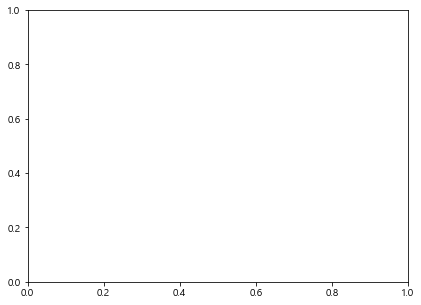

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(cluster_df[cluster_df['cluster']==0]["signal_length"], color="blue", label="0")
sns.distplot(cluster_df[cluster_df['cluster']==1]["signal_length"], color="OrangeRed", label="1")
sns.distplot(cluster_df[cluster_df['cluster']==2]["signal_length"],  color="green", label="2")
plt.legend(title="Cluster")
plt.subplot(1,2,2)
sns.boxplot(cluster_df.cluster,cluster_df.signal_length)
plt.show()

# cluster 새로운 변수로 다시

In [59]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
car_jg["direction"] = lb_make.fit_transform(car_jg["direction"])
car_jg["road_type"] = lb_make.fit_transform(car_jg["road_type"])
car_jg["urban_suburb"] = lb_make.fit_transform(car_jg["urban_suburb"])

In [66]:
cluster_car_jg = car_jg.drop_duplicates('link_id',keep='first')
cluster_car_jg = cluster_car_jg[['link_id','road_name','direction', 'road_length', 'road_num', 'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit', 'entrance', 'signal']]

In [67]:
cluster_car_jg['signal_length'] = cluster_car_jg['signal']/cluster_car_jg['road_length']
cluster_car_jg['entrance_length'] = cluster_car_jg['entrance']/cluster_car_jg['road_length']

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_df = cluster_car_jg.drop(['road_name', 'link_id'],axis=1)
scaler.fit(scale_df)
scale_df = scaler.transform(scale_df)

In [69]:
cluster_car_jg.columns

Index(['link_id', 'road_name', 'direction', 'road_length', 'road_num',
       'road_type', 'urban_suburb', 'cctv', 'kids', 'speed_limit', 'entrance',
       'signal', 'signal_length', 'entrance_length'],
      dtype='object')

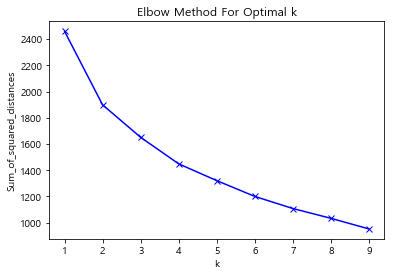

In [70]:
SSD = []
n = 10

for k in range(1,n):
    km = KMeans(n_clusters = k)
    km = km.fit(scale_df)
    SSD.append(km.inertia_)
    
plt.plot(range(1,n), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [75]:
k = 3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_car_jg.drop(['road_name', 'link_id'],axis=1)) 
cluster_car_jg['cluster'] = km.predict(cluster_car_jg.drop(['road_name', 'link_id'],axis=1))

In [76]:
print(cluster_car_jg.cluster.value_counts())
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['speed_limit', 'road_length', 'signal',
       'signal_length'].mean())

0    131
2     66
1      8
Name: cluster, dtype: int64


,speed_limit,road_length,signal,signal_length
cluster,,,,
0,48.244275,270.099237,31.923664,0.125143
1,43.750000,1482.625000,27.375000,0.021317
2,46.515152,605.303030,38.181818,0.065595


In [73]:
k = 3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(scale_df) 
cluster_car_jg['cluster'] = km.predict(scale_df)

In [74]:
print(cluster_car_jg.cluster.value_counts())
pd.DataFrame(cluster_car_jg.groupby(['cluster'])['speed_limit', 'road_length', 'signal',
       'signal_length'].mean())

1    72
0    68
2    65
Name: cluster, dtype: int64


,speed_limit,road_length,signal,signal_length
cluster,,,,
0,44.558824,348.691176,55.088235,0.177749
1,57.361111,384.569444,26.861111,0.086801
2,39.692308,550.676923,19.092308,0.039338


In [77]:
len(set(list(car_jg.start_point.unique()) + list(car_jg.end_point.unique())))

90

In [79]:
car_jg.head(5)

,date,days,road_name,link_id,start_point,end_point,direction,road_length,road_num,road_type,urban_suburb,district,time,value,cctv,kids,speed_limit,entrance,signal,d1,d2,d3,d4,victims,severity,accident_count,inter_num,temperature,wind,rain,snow,holiday,special,vacation,SO2,CO,O3,NO2,PM10,PM2.5
0,20180101,월,금호로,1010006200,청구역,광희문,0,660,1.0,1,1,중구,6,25.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
1,20180101,월,금호로,1010006100,광희문,청구역,1,674,1.0,1,1,중구,6,27.00,1.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
2,20180101,월,금호로,1030014900,청구역,신금호역,1,1083,2.0,1,1,중구,6,26.74,2.0,0.0,40.0,37.0,52.0,1.0,10.0,20.0,6.0,37.0,108.0,28.0,5.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
3,20180101,월,남대문로,1010016900,광교,을지로1가,0,313,5.0,1,0,중구,6,30.82,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
4,20180101,월,남대문로,1010011300,을지로1가,명동입구,0,270,4.0,1,0,중구,6,35.28,1.0,0.0,60.0,14.0,10.0,0.0,14.0,34.0,13.0,61.0,157.0,42.0,4.0,-3.9,2.0,0.0,0.0,1,0,0,0.004,0.5,0.012,0.027,29.0,17.0
